## <center>1st Kaggle competition : digit recognizer</center>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils, to_categorical
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import random
from xgboost import XGBClassifier
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [41]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data.isnull().any().sum()

0

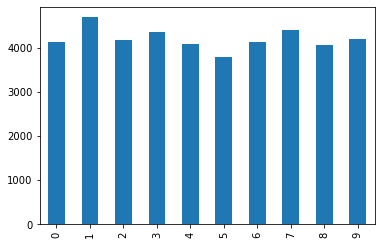

In [44]:
data.label.value_counts().sort_index().plot(kind='bar')

In [45]:
train_data=(data.drop(columns='label')).values
labeled_data_num=(data.label).values
labeled_data=to_categorical(labeled_data_num)
train_data0 = train_data.reshape(train_data.shape[0], 28, 28)

C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<function matplotlib.pyplot.show(*args, **kw)>

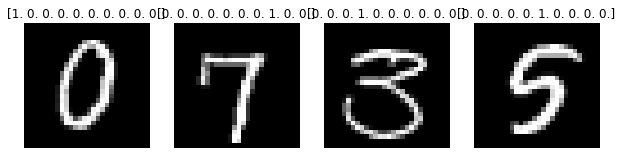

In [46]:
plt.figure(figsize=(13,13))
for i in range(5, 9):
    plt.subplot(450 + (i+1))
    plt.imshow(train_data0[i], cmap=plt.get_cmap('gray'))
    plt.title(labeled_data_num[i])
    plt.axis('off')
plt.show

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='label'), data.label, test_size=0.2, random_state=2)

In [11]:
X=data.drop(columns='label')
y=data.label
# build a classifier
clf = RandomForestClassifier(n_estimators=200)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# use a full grid over all parameters
param_grid = {"max_depth": [1, 3, 5, 6],
              "max_features": [2, 3, 5, 9],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, iid=False)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV took 695.26 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.857 (std: 0.003)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 9}

Model with rank: 2
Mean validation score: 0.853 (std: 0.005)
Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 9}

Model with rank: 3
Mean validation score: 0.827 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3}



In [49]:
rfc  = RandomForestClassifier(n_estimators = 300,criterion= 'gini', max_depth= 5, max_features=9)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.9639285714285715

In [59]:
X=data.drop(columns='label')
y=data.label

xgboost = XGBClassifier()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
# use a full grid over all parameters
param_grid = {"eta": [0.01, 0.2],
              "max_depth": [3,6,9]}

# run grid search
grid_search = GridSearchCV(xgboost, param_grid=param_grid, cv=10, iid=False)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

KeyboardInterrupt: 

In [58]:
xgb=XGBClassifier(objective='multi:softmax', num_class=10, 
        n_jobs=-1,booster="gbtree",tree_method = "hist",
        grow_policy = "depthwise")
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.9332142857142857

In [60]:
# Read data
train = pd.read_csv('train.csv')
labels = train.label.values.astype('int32')
X_train = (train.drop(columns='label').values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(128))
	model.add(Activation('relu'))
	model.add(Dropout(0.15))
	model.add(Dense(nb_classes))
	model.add(Activation('softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

print("Training...")
model.fit(X_train, y_train, nb_epoch=10, batch_size=16, validation_split=0.1, verbose=2)

#print("Generating test predictions...")
#preds = model.predict_classes(X_test, verbose=0)